In [1]:
import numpy as np
import matplotlib.pyplot as plt

import template_22 as phhsi
from pycbc  import  detector

/home/abhirup/src/pycbc/local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
def lnlike(param_vec, data, freq, psd, f_low, f_cut):
        """
        compute the log likelihood
        
        inputs: 
        param_vec : vector of parameters 
        dr, di, 
        freq : Fourier freq 
        psd : psd vector 
        flow,fcut
        
        output: 
        log_likelhood 
        """
        df = np.mean(np.diff(freq))

        N_low=np.int((f_low-freq[0])/df)
        N_cut=np.int((f_cut-freq[0])/df)

        Nls=np.int(f_low/df)  #N_low_signal
        Ncs=np.int(f_cut/df)  #N_cut_signal

        # unpacking the parameter vector 
        Mc, q, dL, i, t0, phi0, ra, sin_dec, pol = param_vec

        # generate the waveform 
        f, hpf, hcf = phhsi.phenomhh_waveform_SI(Mc, q, dL, i, t0, (phi0 %(2.*np.pi)), f_low, df, Ncs)

        # compute antenna patterns 
        Fp,Fc = detector.overhead_antenna_pattern(ra, np.arcsin(sin_dec), pol)

        signal=Fp*hpf+Fc*hcf

        like = -2.*df*np.real(np.dot(data[N_low:N_cut]-signal[Nls:Ncs],np.conj((data[N_low:N_cut]-signal[Nls:Ncs])/psd[N_low:N_cut])))

        return like#log-likelihood
    
def lnprior(param_vec):
        Mc, q, dL, i, t0, phi_0, ra, sin_dec, pol = param_vec
        if 1 < Mc < 200 and 0.05 < q <= 1. and  1.<dL<10000 and 0.<= i <= pi and -15.<= t0 <= 15. and -pi <= phi_0 <= 3.*pi and 0. <= ra < 2.*pi and -1. <= sin_dec <= 1. and 0. <= pol <= pi:
                return 2.*np.log(dL)+np.log(np.sin(i))
        return -np.inf

def lnprob(param_vec):
        lp = lnprior(param_vec)
        if not np.isfinite(lp):
                return -np.inf
        return lp + lnlike(param_vec, data, freq, psd, f_low, f_cut)

f_Nyq = 1098.634953
fM_band: 20.015189 Hz to 1098.604810 Hz
fM_band: 0.013802 Hz to 0.757564 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.035613 secs
f0 = 0.013802 ini_offset_phen_p = 112.755411
...... generated the phen ampl in 0.052474 sec
...... generated the phen phase in 0.051083 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000058 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.110787 secs
mtot = 140.000000 eta = 0.122449 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=6 lmax = 4


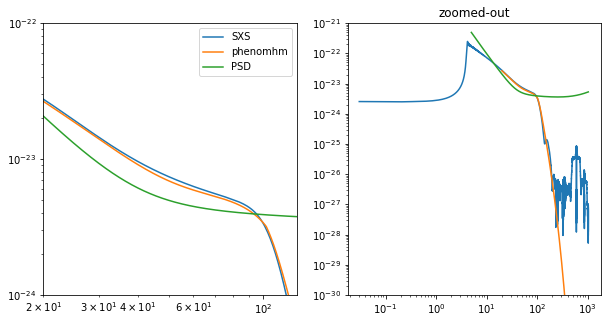

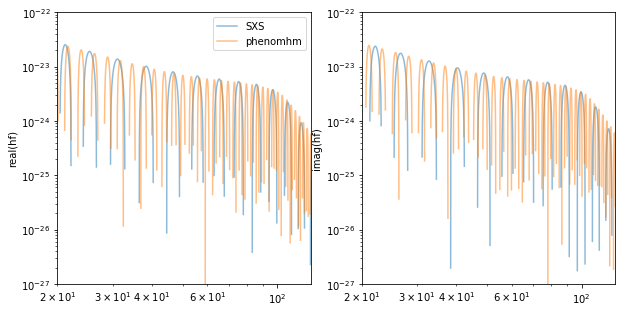

In [3]:
#data
freq, dr, di, psd = np.loadtxt('../injections/nsbh_sxs_20181209/BBH_M_140.00_iota_0.000_pol_0.000_t0_0_data.dat', unpack=True)
data = dr + 1j*di

#best-fit phenom_hm waveform

#parameters corresponding to best-fit phenom_hm waveform
mc_inj, q_inj, dL_inj, iota_inj, t0_inj, phi0_inj, ra_inj, sin_dec_inj, pol_inj = np.loadtxt('../injections/nsbh_sxs_20181209/BBH_M_140.00_iota_0.000_pol_0.000_t0_0_initial.dat', unpack=True)

f_low = 20.
f_cut = 999.
df = np.mean(np.diff(freq))
Ncs=np.int(f_cut/df)
f, hpf, hcf = phhsi.phenomhh_waveform_SI(mc_inj, q_inj, dL_inj, iota_inj, t0_inj, (phi0_inj %(2.*np.pi)), f_low, df, Ncs)
Fp,Fc = detector.overhead_antenna_pattern(ra_inj, np.arcsin(sin_dec_inj), pol_inj)
best_fit_signal=Fp*hpf+Fc*hcf

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.loglog(freq, abs(data), label='SXS')
plt.loglog(f, abs(best_fit_signal), label='phenomhm')
plt.loglog(freq, np.sqrt(psd), label='PSD')
plt.xlim([f_low, 128.])
plt.ylim([1e-24, 1e-22])
plt.legend(loc='best')
plt.subplot(122)
plt.title('zoomed-out')
plt.loglog(freq, abs(data))
plt.loglog(f, abs(best_fit_signal))
plt.loglog(freq, np.sqrt(psd))
plt.ylim([1e-30, 1e-21])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.loglog(freq, np.real(data), label='SXS', alpha=0.5)
plt.loglog(f, np.imag(best_fit_signal), label='phenomhm', alpha=0.5)
plt.ylabel('real(hf)')
plt.ylim([1e-27, 1e-22])
plt.xlim([f_low, 128])
plt.legend(loc='best')
plt.subplot(122)
plt.loglog(freq, np.imag(data), label='SXS', alpha=0.5)
plt.loglog(f, np.real(best_fit_signal), label='phenomhm', alpha=0.5)
plt.ylim([1e-27, 1e-22])
plt.xlim([f_low, 128])
plt.ylabel('imag(hf)')
plt.show()

f_Nyq = 1112.048747
fM_band: 20.015189 Hz to 1112.018604 Hz
fM_band: 0.012165 Hz to 0.675860 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.041831 secs
f0 = 0.012165 ini_offset_phen_p = 103.894314
...... generated the phen ampl in 0.079150 sec
...... generated the phen phase in 0.056983 sec
...... generated the hyb data in 0.000002 sec
...... generated the hyb data2 in 0.000058 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.142629 secs
mtot = 123.394256 eta = 0.122449 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=6 lmax = 4
f_Nyq = 1112.048747
fM_band: 20.015189 Hz to 1112.018604 Hz
fM_band: 0.012165 Hz to 0.675860 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.036085 secs
f0 = 0.012165 ini_offset_phen_p = 103.894314
...... generated the phen ampl in 0.052037 sec
...... generated the phen phase in 0.050413 sec
.

......... generated taylorf2 phase in 0.026825 secs
f0 = 0.012590 ini_offset_phen_p = 106.389993
...... generated the phen ampl in 0.038691 sec
...... generated the phen phase in 0.037570 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000045 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.081469 secs
mtot = 127.711256 eta = 0.122449 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=6 lmax = 4
f_Nyq = 1107.617674
fM_band: 20.015189 Hz to 1107.587531 Hz
fM_band: 0.012661 Hz to 0.700643 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.026898 secs
f0 = 0.012661 ini_offset_phen_p = 106.791101
...... generated the phen ampl in 0.038483 sec
...... generated the phen phase in 0.037645 sec
...... generated the hyb data in 0.000000 sec
...... generated the hyb data2 in 0.000044 sec
..printing Psi_ref
0.0
..... time taken to gener

......... generated taylorf2 phase in 0.026905 secs
f0 = 0.013158 ini_offset_phen_p = 109.492868
...... generated the phen ampl in 0.038422 sec
...... generated the phen phase in 0.037592 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000042 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.080878 secs
mtot = 133.467256 eta = 0.122449 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=6 lmax = 4
f_Nyq = 1103.518177
fM_band: 20.015189 Hz to 1103.488034 Hz
fM_band: 0.013158 Hz to 0.725424 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.026899 secs
f0 = 0.013158 ini_offset_phen_p = 109.492868
...... generated the phen ampl in 0.038549 sec
...... generated the phen phase in 0.037545 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000046 sec
..printing Psi_ref
0.0
..... time taken to gener

......... generated taylorf2 phase in 0.026718 secs
f0 = 0.013654 ini_offset_phen_p = 112.029745
...... generated the phen ampl in 0.038378 sec
...... generated the phen phase in 0.037478 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000045 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.080912 secs
mtot = 138.503756 eta = 0.122449 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=6 lmax = 4
f_Nyq = 1099.720114
fM_band: 20.015189 Hz to 1099.689971 Hz
fM_band: 0.013654 Hz to 0.750207 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.026763 secs
f0 = 0.013654 ini_offset_phen_p = 112.029745
...... generated the phen ampl in 0.038473 sec
...... generated the phen phase in 0.037271 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000044 sec
..printing Psi_ref
0.0
..... time taken to gener

......... generated taylorf2 phase in 0.027093 secs
f0 = 0.014151 ini_offset_phen_p = 114.426548
...... generated the phen ampl in 0.040890 sec
...... generated the phen phase in 0.038145 sec
...... generated the hyb data in 0.000000 sec
...... generated the hyb data2 in 0.000044 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.083790 secs
mtot = 143.540256 eta = 0.122449 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=6 lmax = 4
f_Nyq = 1095.711048
fM_band: 20.015189 Hz to 1095.680904 Hz
fM_band: 0.014222 Hz to 0.778536 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.027026 secs
f0 = 0.014222 ini_offset_phen_p = 114.758759
...... generated the phen ampl in 0.039061 sec
...... generated the phen phase in 0.037591 sec
...... generated the hyb data in 0.000000 sec
...... generated the hyb data2 in 0.000042 sec
..printing Psi_ref
0.0
..... time taken to gener

......... generated taylorf2 phase in 0.026544 secs
f0 = 0.014718 ini_offset_phen_p = 117.020440
...... generated the phen ampl in 0.038579 sec
...... generated the phen phase in 0.037013 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000044 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.080545 secs
mtot = 149.296257 eta = 0.122449 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=6 lmax = 4
f_Nyq = 1092.425422
fM_band: 20.015189 Hz to 1092.395278 Hz
fM_band: 0.014718 Hz to 0.803301 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.026663 secs
f0 = 0.014718 ini_offset_phen_p = 117.020440
...... generated the phen ampl in 0.038120 sec
...... generated the phen phase in 0.037128 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000042 sec
..printing Psi_ref
0.0
..... time taken to gener

......... generated taylorf2 phase in 0.026615 secs
f0 = 0.015215 ini_offset_phen_p = 119.181924
...... generated the phen ampl in 0.045246 sec
...... generated the phen phase in 0.037376 sec
...... generated the hyb data in 0.000000 sec
...... generated the hyb data2 in 0.000049 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.087584 secs
mtot = 154.332757 eta = 0.122449 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=6 lmax = 4
f_Nyq = 1089.380943
fM_band: 20.015189 Hz to 1089.350799 Hz
fM_band: 0.015215 Hz to 0.828086 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.026686 secs
f0 = 0.015215 ini_offset_phen_p = 119.181924
...... generated the phen ampl in 0.038345 sec
...... generated the phen phase in 0.037102 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000047 sec
..printing Psi_ref
0.0
..... time taken to gener

......... generated taylorf2 phase in 0.025992 secs
f0 = 0.017474 ini_offset_phen_p = 161.125822
...... generated the phen ampl in 0.037408 sec
...... generated the phen phase in 0.036430 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000047 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.078601 secs
mtot = 177.244334 eta = 0.082645 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=10 lmax = 4
f_Nyq = 1075.394425
fM_band: 20.015189 Hz to 1075.364281 Hz
fM_band: 0.017474 Hz to 0.938810 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.026039 secs
f0 = 0.017474 ini_offset_phen_p = 161.125822
...... generated the phen ampl in 0.037375 sec
...... generated the phen phase in 0.036466 sec
...... generated the hyb data in 0.000000 sec
...... generated the hyb data2 in 0.000048 sec
..printing Psi_ref
0.0
..... time taken to gene

......... generated taylorf2 phase in 0.026218 secs
f0 = 0.016380 ini_offset_phen_p = 146.677197
...... generated the phen ampl in 0.037893 sec
...... generated the phen phase in 0.036847 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000044 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.079489 secs
mtot = 166.150574 eta = 0.092045 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=9 lmax = 4
f_Nyq = 1081.754673
fM_band: 20.015189 Hz to 1081.724530 Hz
fM_band: 0.016242 Hz to 0.877828 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.026358 secs
f0 = 0.016242 ini_offset_phen_p = 144.866518
...... generated the phen ampl in 0.037975 sec
...... generated the phen phase in 0.036795 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000042 sec
..printing Psi_ref
0.0
..... time taken to gener

......... generated taylorf2 phase in 0.035248 secs
f0 = 0.015497 ini_offset_phen_p = 135.058934
...... generated the phen ampl in 0.050597 sec
...... generated the phen phase in 0.049435 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000057 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.106189 secs
mtot = 157.198833 eta = 0.100945 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=8 lmax = 4
f_Nyq = 1086.185747
fM_band: 20.015189 Hz to 1086.155603 Hz
fM_band: 0.015497 Hz to 0.840990 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.035237 secs
f0 = 0.015497 ini_offset_phen_p = 135.058934
...... generated the phen ampl in 0.050836 sec
...... generated the phen phase in 0.049283 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000056 sec
..printing Psi_ref
0.0
..... time taken to gener

......... generated taylorf2 phase in 0.035172 secs
f0 = 0.014865 ini_offset_phen_p = 126.748297
...... generated the phen ampl in 0.050438 sec
...... generated the phen phase in 0.049176 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000060 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.106004 secs
mtot = 150.788494 eta = 0.108199 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=7 lmax = 4
f_Nyq = 1091.099114
fM_band: 20.015189 Hz to 1091.068971 Hz
fM_band: 0.014769 Hz to 0.805104 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.035162 secs
f0 = 0.014769 ini_offset_phen_p = 125.484580
...... generated the phen ampl in 0.050285 sec
...... generated the phen phase in 0.049023 sec
...... generated the hyb data in 0.000002 sec
...... generated the hyb data2 in 0.000058 sec
..printing Psi_ref
0.0
..... time taken to gener

......... generated taylorf2 phase in 0.035688 secs
f0 = 0.014239 ini_offset_phen_p = 118.512505
...... generated the phen ampl in 0.050922 sec
...... generated the phen phase in 0.049906 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000056 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.106866 secs
mtot = 144.435867 eta = 0.116245 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=6 lmax = 4
f_Nyq = 1095.711048
fM_band: 20.015189 Hz to 1095.680904 Hz
fM_band: 0.014158 Hz to 0.775037 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.035438 secs
f0 = 0.014158 ini_offset_phen_p = 117.442360
...... generated the phen ampl in 0.050723 sec
...... generated the phen phase in 0.049235 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000058 sec
..printing Psi_ref
0.0
..... time taken to gener

f_Nyq = 1099.448824
fM_band: 20.015189 Hz to 1099.418681 Hz
fM_band: 0.013707 Hz to 0.752896 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.026596 secs
f0 = 0.013707 ini_offset_phen_p = 111.501115
...... generated the phen ampl in 0.038109 sec
...... generated the phen phase in 0.037025 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000041 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.080033 secs
mtot = 139.034372 eta = 0.123870 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=6 lmax = 4
f_Nyq = 1099.448824
fM_band: 20.015189 Hz to 1099.418681 Hz
fM_band: 0.013707 Hz to 0.752896 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.026591 secs
f0 = 0.013707 ini_offset_phen_p = 111.501115
...... generated the phen ampl in 0.038047 sec
...... generated the phen phase in 0.037104 sec
.

......... generated taylorf2 phase in 0.026668 secs
f0 = 0.013248 ini_offset_phen_p = 105.455736
...... generated the phen ampl in 0.038803 sec
...... generated the phen phase in 0.037432 sec
...... generated the hyb data in 0.000000 sec
...... generated the hyb data2 in 0.000043 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.081042 secs
mtot = 134.385242 eta = 0.131095 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=5 lmax = 4
f_Nyq = 1103.638751
fM_band: 20.015189 Hz to 1103.608607 Hz
fM_band: 0.013248 Hz to 0.730493 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.026623 secs
f0 = 0.013248 ini_offset_phen_p = 105.455736
...... generated the phen ampl in 0.038275 sec
...... generated the phen phase in 0.037144 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000045 sec
..printing Psi_ref
0.0
..... time taken to gener

......... generated taylorf2 phase in 0.026972 secs
f0 = 0.012850 ini_offset_phen_p = 100.187581
...... generated the phen ampl in 0.038706 sec
...... generated the phen phase in 0.037748 sec
...... generated the hyb data in 0.000001 sec
...... generated the hyb data2 in 0.000043 sec
..printing Psi_ref
0.0
..... time taken to generate phenomhm = 0.081258 secs
mtot = 130.342537 eta = 0.137941 t0 = 0.000000 phi0 = 0.000000 chi1 = 0.000000 chi2 = 0.000000 ampO = 7 phaseO = 7 incl_angle = 0.000000 phi = 0.000000 q=5 lmax = 4
f_Nyq = 1108.160254
fM_band: 20.015189 Hz to 1108.130111 Hz
fM_band: 0.012797 Hz to 0.708502 Hz
......... using template mode l = 2 m  =  2
......... generated taylorf2 phase in 0.026880 secs
f0 = 0.012797 ini_offset_phen_p = 99.490101
...... generated the phen ampl in 0.038493 sec
...... generated the phen phase in 0.037525 sec
...... generated the hyb data in 0.000000 sec
...... generated the hyb data2 in 0.000045 sec
..printing Psi_ref
0.0
..... time taken to genera

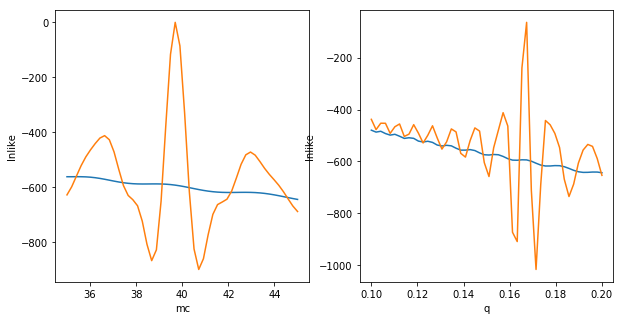

In [4]:
param_set = ['mc','q']
lnlike_data_map = {'mc':[],'q':[]}
lnlike_bfs_map = {'mc':[],'q':[]}
param_range_map = {'mc':np.linspace(35,45,50),'q':np.linspace(0.1,0.2,50)}

plt.figure(figsize=(10,5))
for (idx, param) in enumerate(param_set):
    param_range = param_range_map[param]
    for x in param_range:
        param_vec = mc_inj, q_inj, dL_inj, iota_inj, t0_inj, phi0_inj, ra_inj, sin_dec_inj, pol_inj
        param_vec = list(param_vec)
        param_vec[idx] = x
        param_vec = tuple(param_vec)
        lnlike_data_map[param].append(lnlike(param_vec, data, freq, psd, f_low, f_cut))
        lnlike_bfs_map[param].append(lnlike(param_vec, best_fit_signal, f, psd, f_low, f_cut))
    plt.subplot(1,2,idx+1)
    plt.plot(param_range_map[param], lnlike_data_map[param])
    plt.plot(param_range_map[param], lnlike_bfs_map[param])
    plt.xlabel(param)
    plt.ylabel('lnlike')
    
plt.show()    